<a href="https://colab.research.google.com/github/julienVLNT/python-sandbox/blob/main/machine%20learning/tf_03_CIFAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!python --version

Python 3.7.13


**Julien VALENTIN**, **mars 2022**, selon les T.P de [Bruno DESPRES](https://www.ljll.math.upmc.fr/despres/)

> https://www.ljll.math.upmc.fr/~despres/BD_fichiers/cifar_Trelu.py

In [2]:
from matplotlib import pyplot

from tensorflow import keras
from keras import backend as K
from keras import datasets, layers, models

# Introduction

Une présentation des jeux de données CIFAR est disponible ici

> https://www.cs.toronto.edu/~kriz/cifar.html

CIFAR-10 est une banque d'images classifiées en 10 classes. Les images sont de dimensions $32 \times 32$ dont chaque pixel est un triplet R.G.B.

# Chargement

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [4]:
print("> taille de l'échantillon d'entraînement:", train_images.shape)
print("> taille de l'échantillon de validation:", test_images.shape)

> taille de l'échantillon d'entraînement: (50000, 32, 32, 3)
> taille de l'échantillon de validation: (10000, 32, 32, 3)


# Pré-traitement

In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']    # nom des classes

In [6]:
train_images = train_images / 255.0    # conversion en float et mise à l'échelle : p[i,j] \in [0, 1]
test_images  = test_images / 255.0     # idem

## Visualisation d'un échantillon

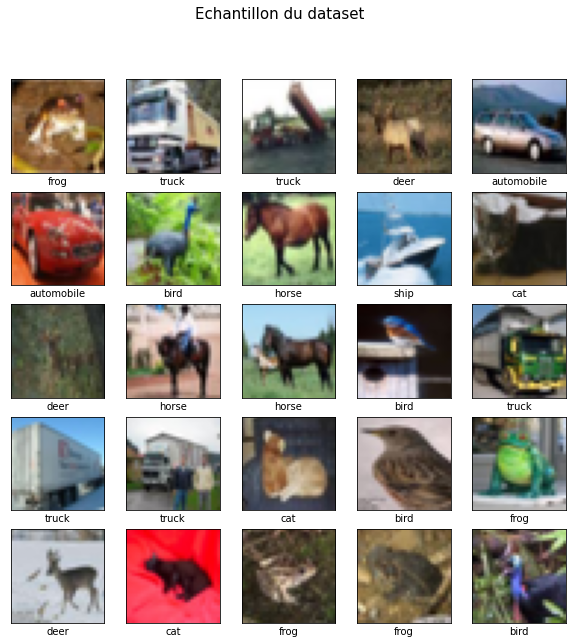

In [7]:
pyplot.figure(figsize=(10,10))
pyplot.suptitle("Echantillon du dataset", size=15)

for i in range(25):
    pyplot.subplot(5,5,i+1)
    pyplot.xticks([])
    pyplot.yticks([])
    pyplot.grid(False)
    pyplot.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    pyplot.xlabel(class_names[train_labels[i][0]])

pyplot.show()

# Construction du modèle

In [8]:
def T_relu(x):
    "Variation sur la REctified Linear Unit"
    return K.relu(x, max_value=1)

In [9]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation=T_relu, input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation=T_relu))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation=T_relu))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation=T_relu))
model.add(layers.Dense(10))

# Compilation du graphe

In [10]:
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Entraînement et visualisation de l'évolution de la performance

Epoch 1/10
1563/1563 [==============================] - 115s 72ms/step - loss: 1.5490 - accuracy: 0.4393 - val_loss: 1.2605 - val_accuracy: 0.5537
Epoch 2/10
1563/1563 [==============================] - 98s 63ms/step - loss: 1.1702 - accuracy: 0.5887 - val_loss: 1.0837 - val_accuracy: 0.6198
Epoch 3/10
1563/1563 [==============================] - 94s 60ms/step - loss: 1.0104 - accuracy: 0.6465 - val_loss: 0.9922 - val_accuracy: 0.6518
Epoch 4/10
1563/1563 [==============================] - 95s 61ms/step - loss: 0.9058 - accuracy: 0.6862 - val_loss: 0.9838 - val_accuracy: 0.6565
Epoch 5/10
1563/1563 [==============================] - 100s 64ms/step - loss: 0.8296 - accuracy: 0.7128 - val_loss: 0.9558 - val_accuracy: 0.6721
Epoch 6/10
1563/1563 [==============================] - 109s 70ms/step - loss: 0.7752 - accuracy: 0.7303 - val_loss: 0.8987 - val_accuracy: 0.6939
Epoch 7/10
1563/1563 [==============================] - 103s 66ms/step - loss: 0.7204 - accuracy: 0.7505 - val_loss: 0.90

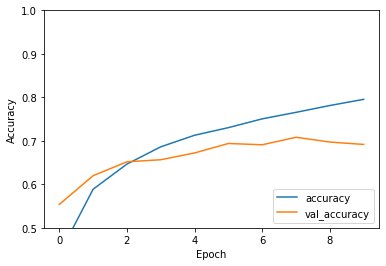

In [11]:
history = model.fit(
                    train_images,
                    train_labels,
                    epochs=10, 
                    validation_data=(test_images, test_labels)
                   )

pyplot.plot(history.history['accuracy'], label='accuracy')
pyplot.plot(history.history['val_accuracy'], label='val_accuracy')
pyplot.xlabel('Epoch')
pyplot.ylabel('Accuracy')
pyplot.ylim([0.5, 1])
pyplot.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

On reconnaît deux zones : l'apprentissage est le meilleur au run $7$, ensuite, la précision sur le jeu de test décroît et on tombe dans une zone de surapprentissage, on prend trop en compte le bruit.